In [3]:
!pip install pandas
!pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Dataset: [Music Albums Popularity Prediction](https://www.kaggle.com/datasets/elemento/music-albums-popularity-prediction?resource=download&select=train.csv)

Информация об альбомах, эпизодах, плейлистах, дорожках, пользователях и т.д со Spotify.
Эти характеристики включают в себя такие атрибуты, как темп песни, уровень акустики, танцевальность песни и многие другие подобные.

1. __Описание данных__:

+ **id**: уникальный идентификатор для каждой строки
+ **name**: название альбома
+ **release_date**: дата выхода альбома
+ **artists**: все исполнители альбома
+ **total_tracks**: общее количество треков в альбоме
+ **t_name**: название трека
+ **t_dur**: продолжительность трека (в секундах)
+ **t_dance**: танцевальность описывает, насколько трек подходит для танцев на основе сочетания музыкальных элементов. Значение 0.0 означает, что трек наименее танцевален, а 1.0 - что он наиболее танцевален.
+ **t_energy**: энергия измеряется в диапазоне от 0.0 до 1.0 и представляет собой перцептивную меру интенсивности и активности.
+ **t_key**: тональность, в которой находится трек. Целые числа преобразуются в высоты звука с использованием стандартной высоты звука.
+ **t_mode**: режим указывает на модальность (мажорную или минорную) трека, тип гаммы, на основе которой формируется его мелодическое содержание. Мажор обозначается цифрой 1, а минор - 0.
+ **t_speech**: разборчивость определяет наличие произносимых слов в треке. Чем больше запись похожа исключительно на речь, тем ближе значение атрибута к 1.0. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произносимых слов. Значения в диапазоне от 0.33 до 0.66 описывают треки, которые могут содержать как музыку, так и речь, в виде фрагментов или слоев, включая, например, рэп-музыку. 
  Значения ниже 0.33, скорее всего, представляют музыку и другие треки, не связанные с речью.
+ **t_acous**: показатель достоверности от 0.0 до 1.0 для определения того, является ли трек акустическим. 1.0 означает высокую степень уверенности в том, что трек является акустическим.
+ **t_ins**: позволяет определить, не содержит ли трек вокала. Чем ближе значение к инструментальности - 1.0, тем больше вероятность того, что трек не содержит вокала. Значения выше 0.5 предназначены для представления инструментальных треков, но достоверность повышается по мере приближения значения к 1.0.
+ **t_live**: определяет присутствие аудитории на записи. Более высокие значения живучести означают повышенную вероятность того, что трек был исполнен вживую. Значение выше 0.8 указывает на высокую вероятность того, что трек был записан вживую.
+ **t_val**: показатель от 0.0 до 1.0, характеризующий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно, в то время как треки с низкой валентностью звучат более негативно (например, грустные, депрессивные, злые).
+ **t_tempo**: общий предполагаемый темп трека в ударах в минуту (BPM). В музыкальной терминологии темп - это скорость или темпотактив данного произведения, который напрямую зависит от средней продолжительности такта.
+ **t_sig**: Предполагаемая общая временная характеристика трека. Временная метрика (meter) - это условное обозначение, указывающее, сколько ударов приходится на каждый такт (или такт измерения).


2. __Целевая переменная__: **popularity**
Это числовая переменная, представляющая популярность музыкального альбома. Чем выше значение, тем более популярным считается альбом.

In [11]:
df = pd.read_csv('music_albums.csv')

In [31]:
# Предварительный анализ данных
print(df.head(20))
print(df.info())
print(df.describe())
print(df.isnull().sum())

      neo_id                 name  absolute_magnitude  estimated_diameter_min  \
0    2162117   162117 (1998 SD15)               19.14                0.394962   
1    2349507     349507 (2008 QY)               18.50                0.530341   
2    2455415     455415 (2003 GA)               21.45                0.136319   
3    3132126            (2002 PB)               20.63                0.198863   
4    3557844            (2011 DW)               22.70                0.076658   
5    3656926           (2014 BT8)               25.00                0.026580   
6    3421513           (2008 OX1)               21.50                0.133216   
7    3541504         (2010 OF101)               19.75                0.298233   
8    3836942            (2018 YH)               21.70                0.121494   
9    3892166          (2019 UP13)               23.45                0.054269   
10  54245816           (2022 CM3)               26.02                0.016617   
11   2627157    627157 (2008

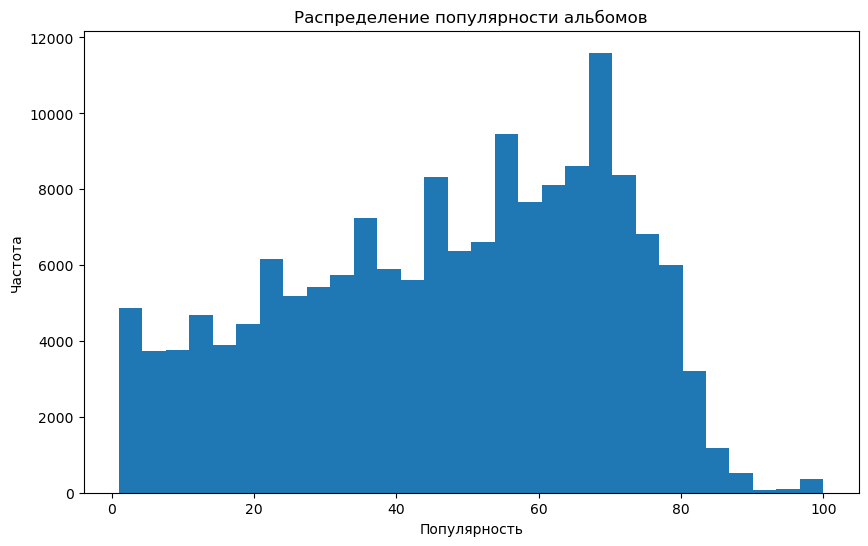

In [15]:
# Анализ целевой переменной
plt.figure(figsize=(10, 6))
df['popularity'].hist(bins=30)
plt.title('Распределение популярности альбомов')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.grid(False)
plt.show()

In [17]:
# Анализ категориальных признаков
print(df['name'].value_counts().head(10))
print(df['release_date'].value_counts().head(10))
print(df['artists'].value_counts().head(10))
print(df['total_tracks'].value_counts().head(10))

name
Certified Lover Boy                  173
Greatest Hits                        161
Donda                                120
Legends Never Die                    116
Golden Hour                          114
Long Term Effects of SUFFERING       109
The Off-Season                       109
INDUSTRY BABY (feat. Jack Harlow)    107
Planet Her                           103
VHS                                  102
Name: count, dtype: int64
release_date
2021-09-03    1695
2021-09-10    1518
2021-08-13    1177
2021-08-27    1104
2021-07-30     988
2021-06-25     985
2021-07-23     938
2021-08-06     920
2021-05-21     842
2021-07-09     811
Name: count, dtype: int64
artists
Various Artists,        3521
Drake,                   580
Taylor Swift,            527
Kanye West,              501
$uicideboy$,             420
BTS,                     362
J. Cole,                 325
Eminem,                  316
Lil Uzi Vert,            304
Tyler, The Creator,      303
Name: count, dtype: int64
total_

### 2. Binary Classification
Dataset: [NASA | Nearest Earth Objects (1910-2024)](https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024)

В космосе много опасных тел, одно из них - N.E.O. - "Ближайшие земные объекты". Некоторые такие тела действительно представляют опасность для планеты Земля, NASA классифицирует их как "is_hazardous". Этот набор данных содержит ВСЕ наблюдения NASA за подобными объектами с 1910 по 2024 год.


1. __Описание данных__:

+ **neo_id**: уникальный идентификатор для каждого астероида.
+ **name**: название астероида.
+ **absolute_magnitude**: описывает внутреннюю светимость.
+ **estimated_diameter_min**: минимальный расчетный диаметр в километрах.
+ **estimated_diameter_max**: максимальный расчетный диаметр в километрах.
+ **orbiting_body**: планета, вокруг которой вращается астероид.
+ **relative_velocity**: скорость относительно планеты в км/ч.
+ **miss_distance**: пропущенное расстояние в километрах.


2. __Целевая переменная__: **is_hazardous**
Логическая переменная, которая показывает, является ли астероид опасным или нет.

In [21]:
df = pd.read_csv('nearest_earth_objects.csv')

In [33]:
# Предварительный анализ данных
print(df.head(20))
print(df.info())
print(df.describe())
print(df.isnull().sum())

      neo_id                 name  absolute_magnitude  estimated_diameter_min  \
0    2162117   162117 (1998 SD15)               19.14                0.394962   
1    2349507     349507 (2008 QY)               18.50                0.530341   
2    2455415     455415 (2003 GA)               21.45                0.136319   
3    3132126            (2002 PB)               20.63                0.198863   
4    3557844            (2011 DW)               22.70                0.076658   
5    3656926           (2014 BT8)               25.00                0.026580   
6    3421513           (2008 OX1)               21.50                0.133216   
7    3541504         (2010 OF101)               19.75                0.298233   
8    3836942            (2018 YH)               21.70                0.121494   
9    3892166          (2019 UP13)               23.45                0.054269   
10  54245816           (2022 CM3)               26.02                0.016617   
11   2627157    627157 (2008

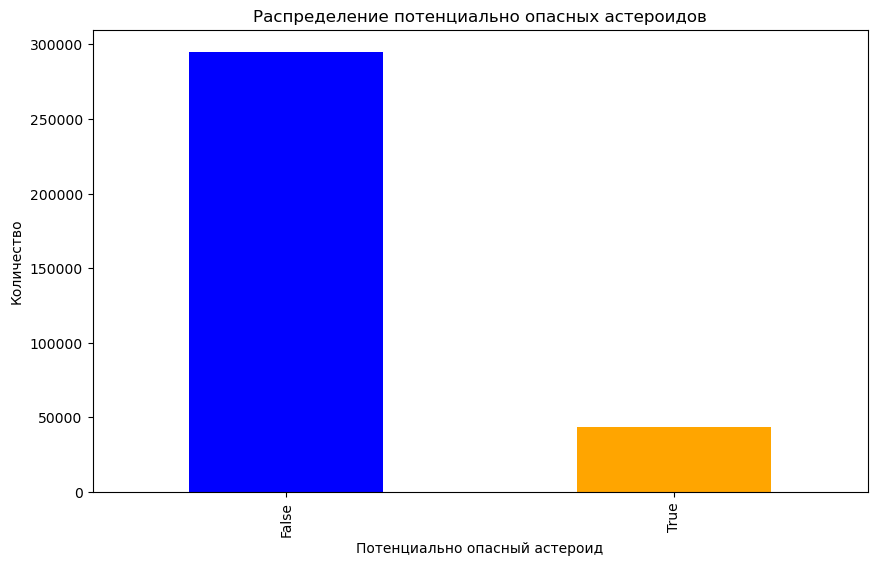

In [25]:
# Анализ целевой переменной
target_counts = df['is_hazardous'].value_counts()

plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Распределение потенциально опасных астероидов')
plt.xlabel('Потенциально опасный астероид')
plt.ylabel('Количество')
plt.grid(False)
plt.show()

In [27]:
# Анализ категориальных признаков
print(df['name'].value_counts().head(10))
print(df['estimated_diameter_min'].value_counts().head(10))
print(df['estimated_diameter_max'].value_counts().head(10))
print(df['relative_velocity'].value_counts().head(10))

name
277810 (2006 FV35)               211
469219 Kamo`oalewa (2016 HO3)    197
(2014 OL339)                     192
(2017 FZ2)                       186
(2023 FW13)                      169
(2022 YF4)                       151
164207 (2004 GU9)                135
85770 (1998 UP1)                 101
138852 (2000 WN10)                99
(2015 RE36)                       98
Name: count, dtype: int64
estimated_diameter_min
0.035039    2208
0.016016    2088
0.031956    2083
0.021113    2048
0.029144    2038
0.030518    2015
0.026580    1957
0.050647    1929
0.038420    1927
0.025384    1901
Name: count, dtype: int64
estimated_diameter_max
0.078350    2208
0.035813    2088
0.071456    2083
0.047211    2048
0.065169    2038
0.068240    2015
0.059435    1957
0.113250    1929
0.085909    1927
0.056760    1901
Name: count, dtype: int64
relative_velocity
78755.067690    2
95734.914906    2
84591.638456    2
51964.058408    2
58574.370714    2
57139.219620    2
94096.052691    2
88058.533098    2